# Analyzing Pixel Classification "As a Whole"

This notebook depends on the SupervisedClassifier notebook having been run first!!

In [1]:
import os
import numpy as np
import pandas as pd

import palmettobug as pbug

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [2]:
my_computer_path =  "C:/Users/Default/Desktop"  ## CHANGE This DIRECTORY to match an existing directory on your computer if you testing this tutorial on your own machine!

## Setting up for a Whole-Class Analysis

This requires:

    1). a pixel classification to have been run (usually a supervised classifier, but sometimes a merged / annotated unsupervised classifier could be used)

    2). Region measurements must be taken from the classifier's predictions (treating them as if they are segmentation masks)

    3). The set-up of Analysis_panel.csv and metadata.csv files, just like for standard single-cell / CATALYST-like analyses

In this case, requirements #1 and #3 will depend on other notebooks where those steps have already been done, but requirement #2 we 
do within this notebook, then load for whole-class analysis. 

In [3]:
''' Gather directories from which we'll read pixel class region properties '''

project_directory = f'{my_computer_path}/Example_IMC'

pixel_classifier_output = f'{project_directory}/Pixel_Classification/lumen_epithelia_laminapropria/classification_maps'

whole_class_directory = f'{project_directory}/Pixel_Classification/lumen_epithelia_laminapropria/Whole_class_analysis'
if not os.path.exists(whole_class_directory):
    os.mkdir(whole_class_directory)

In [4]:
''' Make region measurements from pixel classifications '''

experiment = pbug.imc_entrypoint(project_directory, resolutions =  [1.0, 1.0], from_mcds = False) 
analysis_folder_name = "Whole_class_analysis"
input_img_folder = experiment.directory_object.img_dir + "/img"
experiment.make_segmentation_measurements(input_img_folder, 
                                          pixel_classifier_output, 
                                          output_intensities_folder = whole_class_directory + "/intensities", 
                                          output_regions_folder  = whole_class_directory + "/regionprops", 
                                          statistic = 'mean',
                                          re_do = True)

CRC_1_ROI_001.ome intensities csv has been written!
CRC_1_ROI_002.ome intensities csv has been written!
CRC_2_ROI_001.ome intensities csv has been written!
CRC_2_ROI_002.ome intensities csv has been written!
CRC_2_ROI_003.ome intensities csv has been written!
CRC_2_ROI_004.ome intensities csv has been written!
CRC_3_ROI_001.ome intensities csv has been written!
CRC_3_ROI_002.ome intensities csv has been written!
CRC_3_ROI_003.ome intensities csv has been written!
CRC_3_ROI_004.ome intensities csv has been written!
CRC_1_ROI_001.ome regions csv has been written!
CRC_1_ROI_002.ome regions csv has been written!
CRC_2_ROI_001.ome regions csv has been written!
CRC_2_ROI_002.ome regions csv has been written!
CRC_2_ROI_003.ome regions csv has been written!
CRC_2_ROI_004.ome regions csv has been written!
CRC_3_ROI_001.ome regions csv has been written!
CRC_3_ROI_002.ome regions csv has been written!
CRC_3_ROI_003.ome regions csv has been written!
CRC_3_ROI_004.ome regions csv has been written!


In [5]:
class_dict = {1: "lumen", 2: "epithelia", 3: "lamina_propria"}

seed_df = pd.DataFrame()
seed_df['class'] = [i for i in class_dict]
seed_df['labels'] = [class_dict[i] for i in class_dict]
zip_dict = {}
for i,ii in enumerate(seed_df['labels'].unique()):
    zip_dict[ii] = i

seed_df['merging'] = seed_df['labels'].replace(zip_dict)
seed_df


## Each of these dataframes has been created previously -- so in this case I will just retrieve them from the disc
classifier_df = seed_df
metadata = pd.read_csv(project_directory +  "/Analyses/metadata.csv")
panel = pd.read_csv(project_directory +  "/Analyses/Analysis_panel.csv")

metadata.to_csv(whole_class_directory + "/metadata.csv", index = False)
panel.to_csv(whole_class_directory + "/Analysis_panel.csv", index = False)

whole_class_analysis = pbug.WholeClassAnalysis(directory = whole_class_directory, classifier_df = classifier_df, metadata = metadata, 
                             Analysis_panel = panel)

## Now we can make plots

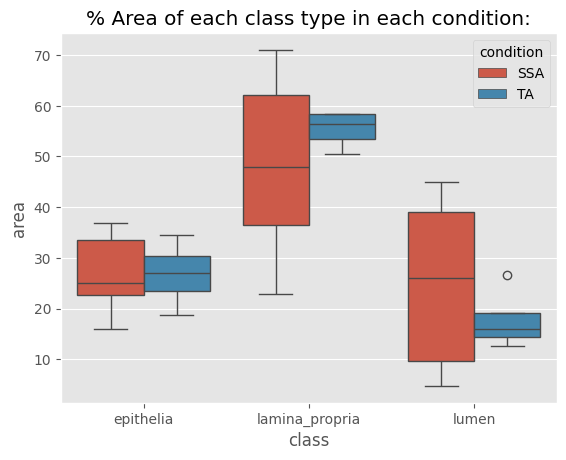

In [6]:
'''Compare area of each pixel class between conditions:'''
fig = whole_class_analysis.plot_percent_areas()
fig

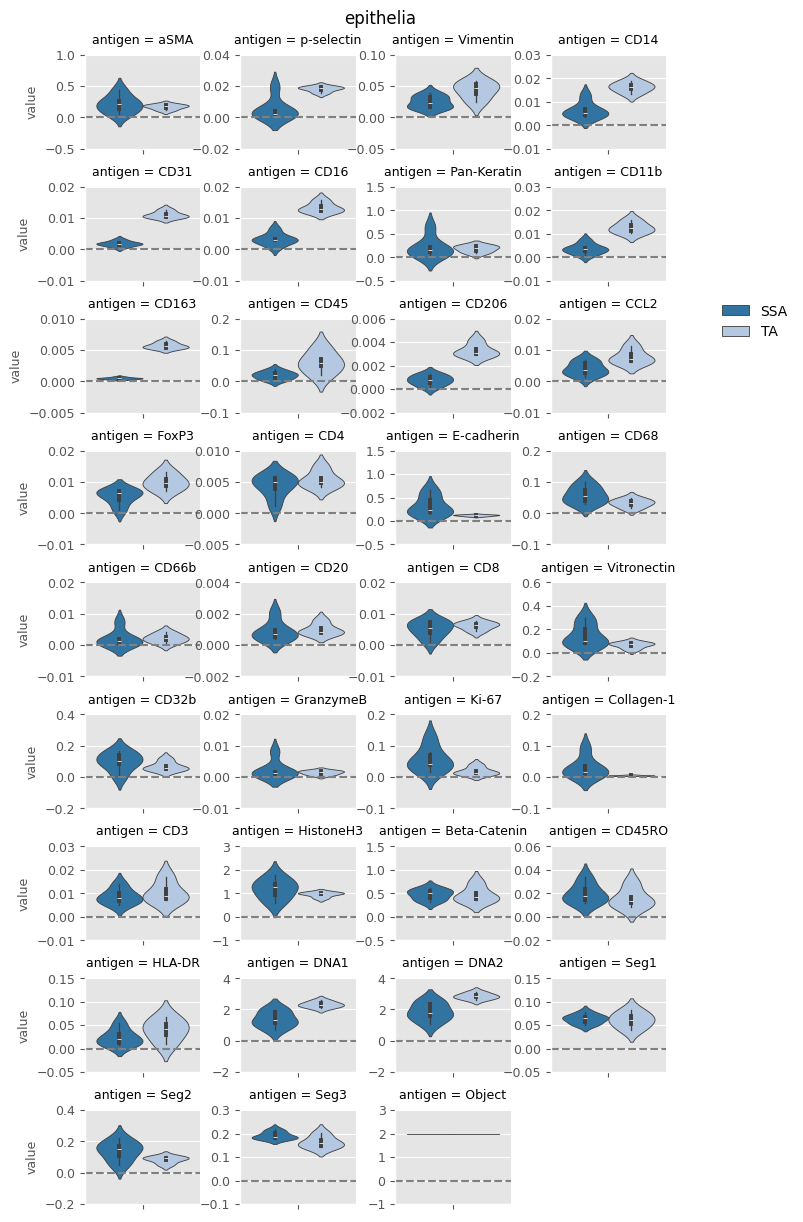

In [7]:
''' Look at the distribution of markers within a pixel class '''
facet_grid = whole_class_analysis.plot_distribution_exprs(unique_class = 'epithelia', plot_type = 'Violin')
facet_grid.figure

## Do Stats

The available statistics are very limited / basic. More advanced statistics should be done with a different software, 
and given that it is important to check the assumptions of the available statistical tests, it is generally
best to do any statistical analysis w9ith at least the help of a differnet software.

In [8]:
whole_class_analysis.whole_marker_exprs_ANOVA(marker_class = 'type', groupby_column = 'class', variable = 'condition', statistic = 'ANOVA', area = True)

,antigen,class,p_adj,p_value,F statistic,avg SSA mean exprs,SSA stdev,avg TA mean exprs,TA stdev
15,CD163,epithelia,2.330000e-08,7.780000e-09,609.000000,0.000481,0.000161,0.00570,0.000494
27,CD31,epithelia,9.460000e-07,3.150000e-07,237.000000,0.001830,0.000828,0.01110,0.001080
85,p-selectin,lamina_propria,1.050000e-06,3.500000e-07,231.000000,0.003850,0.001200,0.01690,0.001530
23,CD206,lumen,1.810000e-06,6.050000e-07,200.000000,0.000653,0.000191,0.00336,0.000417
8,CD11b,lumen,1.870000e-05,6.230000e-06,109.000000,0.001450,0.000872,0.00847,0.001280
...,...,...,...,...,...,...,...,...,...
50,CD8,lumen,9.660000e-01,9.660000e-01,0.001990,0.002090,0.001490,0.00205,0.000876
16,CD163,lamina_propria,9.690000e-01,9.690000e-01,0.001660,0.005430,0.004530,0.00552,0.000517
42,CD66b,epithelia,9.690000e-01,9.690000e-01,0.001590,0.002170,0.002720,0.00223,0.001450
0,Beta-Catenin,epithelia,9.760000e-01,9.760000e-01,0.000944,0.475000,0.113000,0.47200,0.168000


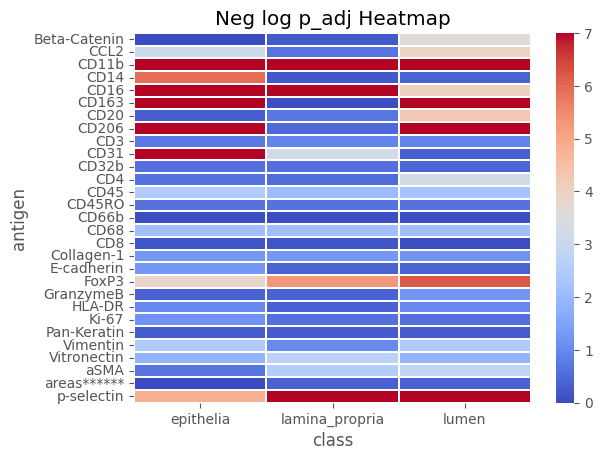

In [9]:
whole_class_analysis.plot_heatmap("p_adj")

## Or export the data in tabular form to examine in another software / package:

In [10]:
to_export = whole_class_analysis.export_data(filename = None,           #Or specify a file path to write to, usch as:   whole_class_analysis.directory + "/my_data_export.csv", 
                        subset_columns = None, 
                        subset_types = None, 
                        groupby_columns = None, 
                        statistic= 'mean',
                        include_marker_class_row = False)   ## TODO: figure out csv reload with whole class analysis --> for now, not supported
to_export

C:\Users\benca\miniforge3\envs\pbug\lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


antigen,aSMA,p-selectin,Vimentin,CD14,CD31,CD16,Pan-Keratin,CD11b,CD163,CD45,...,Seg2,Seg3,index,sample_id,file_name,patient_id,condition,Object,class,areas
0,0.046404,0.002377,0.021375,0.077686,0.001858,0.003592,0.373355,0.003115,0.000352,0.014310,...,0.105902,0.168999,0,0,CRC_1_ROI_001.ome.fcs,7139,SSA,1,lumen,16.497600
1,0.279869,0.004667,0.038276,0.012763,0.003151,0.006478,0.643430,0.007177,0.000741,0.037614,...,0.218496,0.217236,1,0,CRC_1_ROI_001.ome.fcs,7139,SSA,2,epithelia,36.050400
2,0.583634,0.005288,0.231591,0.038185,0.015873,0.008793,0.159639,0.010919,0.002667,0.175283,...,0.200154,0.181208,2,0,CRC_1_ROI_001.ome.fcs,7139,SSA,3,lamina_propria,47.452000
3,0.052761,0.001284,0.016471,0.055562,0.001277,0.001374,0.048797,0.001126,0.000179,0.014350,...,0.067809,0.152127,3,1,CRC_1_ROI_002.ome.fcs,7139,SSA,1,lumen,35.531467
4,0.441734,0.019529,0.028416,0.005586,0.002109,0.003486,0.095743,0.003626,0.000498,0.020471,...,0.148266,0.181678,4,1,CRC_1_ROI_002.ome.fcs,7139,SSA,2,epithelia,15.908267
5,0.461414,0.003406,0.134013,0.023865,0.008549,0.005665,0.036053,0.004593,0.002851,0.090782,...,0.228512,0.158975,5,1,CRC_1_ROI_002.ome.fcs,7139,SSA,3,lamina_propria,48.560267
6,0.043961,0.001348,0.039967,0.017418,0.001145,0.001152,0.063610,0.001428,0.000256,0.030570,...,0.074013,0.166255,6,2,CRC_2_ROI_001.ome.fcs,7139,SSA,1,lumen,40.148800
7,0.050636,0.002190,0.015143,0.004244,0.001938,0.002836,0.239402,0.003481,0.000497,0.020262,...,0.093077,0.189527,7,2,CRC_2_ROI_001.ome.fcs,7139,SSA,2,epithelia,36.967600
8,0.385122,0.003522,0.240166,0.021005,0.011558,0.004695,0.016083,0.007222,0.003367,0.160490,...,0.135513,0.174451,8,2,CRC_2_ROI_001.ome.fcs,7139,SSA,3,lamina_propria,22.883600
9,0.048720,0.001244,0.017306,0.027874,0.000866,0.001455,0.084637,0.000899,0.000146,0.005761,...,0.128837,0.157224,9,3,CRC_2_ROI_002.ome.fcs,7139,SSA,1,lumen,44.958000
